In [ ]:
import altair as alt
import pandas as pd
alt.data_transformers.disable_max_rows()

In [ ]:
alt.__version__

Import dataset using vega_datasets repository

In [ ]:
from vega_datasets import data
cars = data.cars()
cars.head()

# First example in Altair

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
)

## With interactions

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name']
).interactive()

# Altair - Specifying Data

In [ ]:
dataset = alt.Data(values=[{'x': 'A', 'y': 5},
                        {'x': 'B', 'y': 3},
                        {'x': 'C', 'y': 6},
                        {'x': 'D', 'y': 7},
                        {'x': 'E', 'y': 2}])
alt.Chart(dataset).mark_bar().encode(
    x='x:N',  # specify nominal data
    y='y:Q',  # specify quantitative data
)

# Wide form vs Long Form

In [ ]:
df = pd.DataFrame([
    {"Date": "2007-10-01", "AAPL": 189.95, "AMZN": 89.15, "GOOG": 707.00},
    {"Date": "2007-11-01", "AAPL": 182.22, "AMZN": 90.56, "GOOG": 693.00},
    {"Date": "2007-12-01", "AAPL": 198.08, "AMZN": 92.64, "GOOG": 691.48}
])
df

## Altair loves Long Form

In [ ]:
# Example of creating a simple line chart with this data
# First, we need to transform the data to long format for Altair
df_long = pd.melt(df, id_vars=['Date'], value_vars=['AAPL', 'AMZN', 'GOOG'],
                 var_name='Stock', value_name='Price')

df_long

In [ ]:
# Create a simple line chart
chart = alt.Chart(df_long).mark_line().encode(
    x='Date:T',
    y='Price:Q',
    color='Stock:N'
).properties(
    width=600,
    height=400,
    title='Stock Prices (Oct-Dec 2007)'
)
chart

# Altair - Encodings

In [ ]:
cars = data.cars()

In [ ]:
cars

## One dimensional graph

In [ ]:
alt.Chart(cars).mark_point().encode(x='Horsepower')

### with a different marker

In [ ]:
alt.Chart(cars).mark_rule().encode(x='Horsepower')

## Two dimensional graph

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
)

In [ ]:
alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Cylinders:O',
    tooltip=['Name']
)

# Altair Syntax

## Short Syntax

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    shape='Origin'
)

## Attribute-based Syntax

In [ ]:
alt.Chart(cars).mark_point().encode(
    alt.X('Horsepower', type="quantitative"),
    alt.Y('Miles_per_Gallon').title('Miles per Gallon'),
    color='Origin',
    shape='Origin'
)

## Method-based Syntax

In [ ]:
alt.Chart(cars).mark_point().encode(
    alt.X('Horsepower'),
    alt.Y('Miles_per_Gallon', title="Miles per Gallon"),
    color='Origin',
    shape='Origin'
)

# Encodings Data Types

Altair supports five main data types for encodings:

| Data Type    | Shorthand Code | Description                       |
|--------------|----------------|-----------------------------------|
| quantitative | Q              | a continuous real-valued quantity |
| ordinal      | O              | a discrete ordered quantity       |
| nominal      | N              | a discrete unordered category     |
| temporal     | T              | a time or date value              |
| geojson      | G              | a geographic shape                |

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Acceleration:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N'
)

## Choosing the correct data type (colors)

In [ ]:
base = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
).properties(width=200, height=200)

alt.hconcat(
   base.encode(color='Cylinders:Q').properties(title='quantitative'),
   base.encode(color='Cylinders:O').properties(title='ordinal'),
   base.encode(color='Cylinders:N').properties(title='nominal'),
)

## Choosing the correct data type (time)

In [ ]:
base = alt.Chart(cars).mark_bar().encode(
    alt.Y('mean(Horsepower):Q').title('Horsepower')
).properties(width=200, height=200)
alt.hconcat(
    base.encode(x='Year:O').properties(title='ordinal'),
    base.encode(x='Year:Q').properties(title='quantitative'),
    base.encode(x='Year:T').properties(title='temporal')
)

# Aggregation

In [ ]:
cars

In [ ]:
alt.Chart(cars).mark_bar().encode(
    y='Cylinders:O',
    x='mean(Acceleration):Q',
)

### binning

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.Color('Acceleration:Q').bin(maxbins=5)
)

### distribution

auto-binning

In [ ]:
alt.Chart(cars).mark_bar().encode(
    alt.X('Miles_per_Gallon:Q', bin=True, title='Miles per Gallon'),
    alt.Y('count()', title='Freq')
)

binning control

In [ ]:
alt.Chart(cars).mark_bar().encode(
    alt.X('Horsepower:Q', bin=alt.Bin(maxbins=10)),
    alt.Y('count()', title='Freq', stack=None)
)

kernel density distribution (advanced - using transform functions)

In [ ]:
alt.Chart(cars).mark_area().encode(
    x="Acceleration:Q",
    y='density:Q',
).transform_density(
    'Acceleration',
    as_=['Acceleration', 'density'],
)

### Boxplot

In [ ]:
alt.Chart(cars).mark_boxplot(size=30, opacity=0.7).encode(
    x=alt.X(field='Acceleration',type='quantitative', scale=alt.Scale(zero=False)),
    y='Cylinders:N',
    color=alt.Color('Cylinders:N',legend=None),
    tooltip=['Name','Acceleration']
).properties(
    width=600,
    height=300
)

# Visual Exploration of gapminder

In [ ]:
path = 'https://raw.githubusercontent.com/danielefadda/DVVA_Master/refs/heads/main/Master_2025/altair_scripts/data/gapminder_tidy.csv'
gap=pd.read_csv(path, parse_dates=['Year'])

In [ ]:
# # Local dataset
# gap=pd.read_csv('data/gapminder_tidy.csv', parse_dates=['Year'])

gap

# Binning Alternatives

**Please Note** the following line of code allows you to exceed Altair's 5000-line limit

In [ ]:
alt.data_transformers.enable('default', max_rows=None)

In [ ]:
gap2000=gap[gap['Year']=='2000']
gap2000.head()

## binned distribution of life expectancy

In [ ]:
alt.Chart(gap2000).mark_bar(tooltip=True).encode(
    alt.X(
        field='life',
        type='quantitative',
        bin=alt.BinParams(maxbins=8),
        title='life expectancy'),
    alt.Y(aggregate='count', title='Number of Countries'),
)

In [ ]:
alt.Chart(gap2000).mark_bar(tooltip=True).encode(
    alt.X(
        field='life',
        type='quantitative',
        bin=alt.BinParams(maxbins=8),
        title='life expectancy'),
    alt.Y(aggregate='count', title='Number of Countries'),
    alt.Color(field='region', type='nominal')
)

**Exercise**: Can you find alternative strategies of stacking? Can they help to improve the chart? In which way?

In [ ]:
alt.Chart(gap2000).mark_rect(tooltip=True).encode(
    x=alt.X('life:Q',bin=True),
    color='count()',
    y=alt.Y('region',title=None),
)

In [ ]:
alt.Chart(gap2000).mark_circle(tooltip=True).encode(
    x=alt.X('life:O',bin=True),
    size='count()',
    color='count()',
    y=alt.Y('region',title=None),
)

# Split, apply, combine

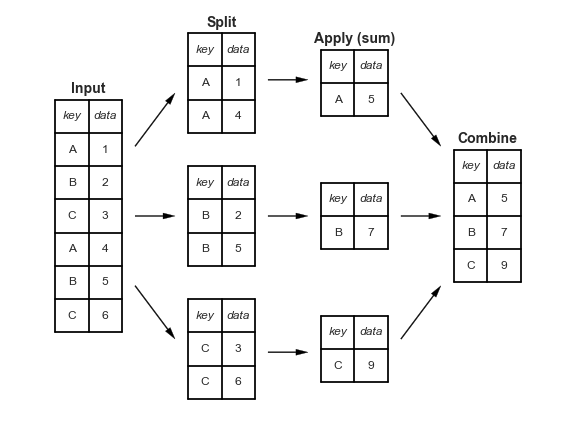

The Pandas way

In [ ]:
gap2000.groupby(by='region')['population'].agg('sum').reset_index()

The Altair way

In [ ]:
alt.Chart(gap2000).mark_bar(tooltip=True).encode(
    y='region',
    x='sum(population)'
)

In [ ]:
alt.Chart(gap2000).mark_bar().encode(
    alt.X(field='population',type='quantitative',aggregate='sum'),
    alt.Y(
        field='region',
        type='ordinal',
        sort= alt.EncodingSortField(field='population', op='sum', order='descending')
        )
)

# Layering

In [ ]:
base = alt.Chart(gap).encode(
    x=alt.X(field = 'Year',title='Year', type='temporal'),
    y= 'mean(gdp):Q',
    color='region:N'
).properties(width=800, height=200)

base.mark_line(point=True)


In [ ]:
lines = alt.Chart(gap).mark_line(tooltip=True, point=True).encode(
    x='year(Year):T',
    y='mean(gdp):Q',
    color='region:N'
)

area = alt.Chart(gap).mark_area(tooltip=True,opacity=0.3).encode(
    x='year(Year):T',
    y='ci0(gdp):Q', # The lower boundary of the bootstrapped 95% confidence interval of the mean.
    y2='ci1(gdp):Q', # # The upper boundary of the bootstrapped 95% confidence interval of the mean.
    color='region:N'
)


In [ ]:
area.properties(width=600)

In [ ]:
# lines + area  # or the extendend form:
alt.layer(lines, area).properties(width=600, height=400)

# Concatenate

In [ ]:
# Common definition of scales to share the same mappings
xscale = alt.Scale(domain=(0, 90))
yscale = alt.Scale(domain=(0, 8))


lifeDist = alt.Chart(gap2000)\
.mark_bar(
    tooltip=True,
    color='gray'
    )\
.encode(
    x=alt.X(field='life',type='quantitative',bin=alt.BinParams(maxbins=20), scale=xscale,  title=None),
    y=alt.Y('count()',type='quantitative',title=None)
  )\
.properties(width=400,height=60)

scatter = alt.Chart(gap2000).mark_point().encode(
    alt.X(field='life',type='quantitative', scale=xscale),
    alt.Y(field='fertility',type='quantitative', scale=yscale),
    alt.Color(field='region',type='nominal')
).properties(
    width=400,
    height=400
)

fertilityDist = alt.Chart(gap2000)\
.mark_bar(
    tooltip=True,
    color='gray'
    )\
.encode(
    y=alt.Y(field='fertility',type='quantitative',bin=alt.BinParams(maxbins=20), scale=yscale,title=None),
    x=alt.X('count()', title=None)
  )\
.properties(width=60,height=400)


row2=alt.hconcat(scatter, fertilityDist)

alt.vconcat(lifeDist,row2)
# (scatter ^ lifeDist)
# (scatter |fertilityDist)
#

In [ ]:
scatter.properties(width=200,height=200).facet(column='region:N', columns=2)

# Exercise:
Visualize the gdp trend using a facetted chart per region.
Plot a mean line on each chart

In [ ]:
gap

In [ ]:
countries = alt.Chart(gap).mark_line().encode(
    alt.X('Year', type="temporal"),
    alt.Y('gdp', type="quantitative"),
    detail='Country:N'
)

avgCountries = alt.Chart(gap).mark_line(color="#ff0000").encode(
    alt.X('Year', type="temporal"),
    alt.Y('mean(gdp)', type="quantitative"),
)

(countries + avgCountries)

In [ ]:
countries = alt.Chart(gap).mark_line(color="#cccccc99").encode(
    alt.X('Year', type="temporal"),
    alt.Y('gdp', type="quantitative"),
    detail='Country:N'
)

avgCountries = alt.Chart(gap).mark_line(color="#ff0000").encode(
    alt.X('Year', type="temporal"),
    alt.Y('mean(gdp)', type="quantitative"),
)

(countries + avgCountries).facet("region:N", columns=3)

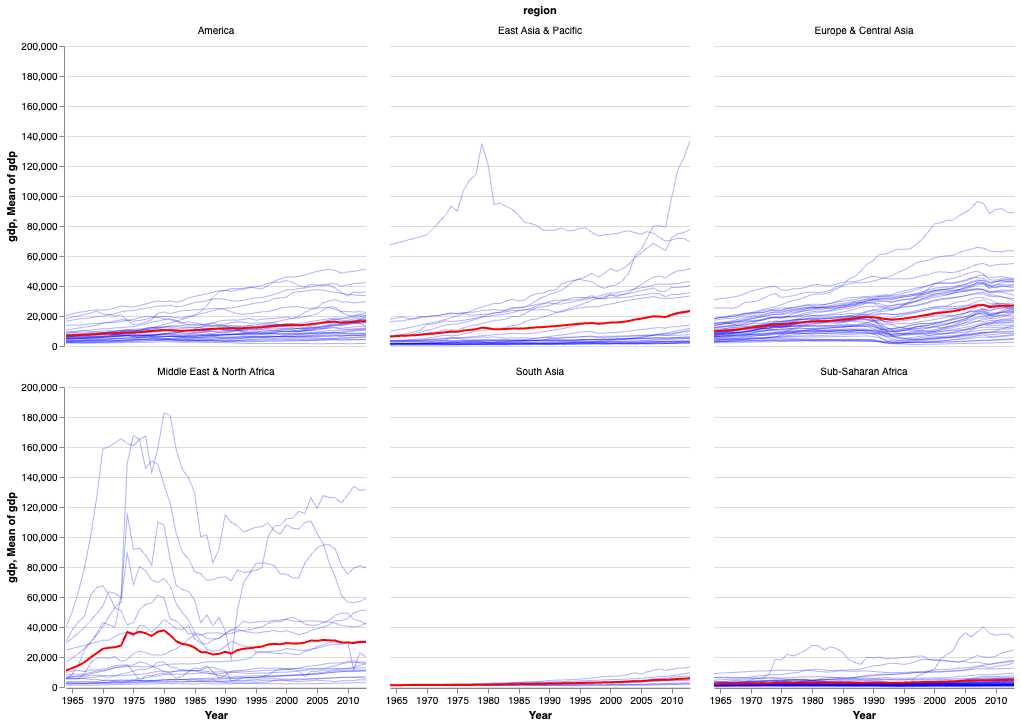